<a href="https://colab.research.google.com/github/sahil-bhatia-iitbhu/deep_understanding_of_deep_learning/blob/main/11_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Autoencoders

1. Auto + Encoder, means Self + Information Retriever
2. Its structure is:
- Input (n unit layer)
- Encoder (m (< n) unit layer)
- Bottleneck Latent Code (k (< m) unit layer)
- Decoder (~m (< n) unit layer)
- Output (~n unit layer)
3. Loss Function:
- 1/n * sum(output - input)^2 [MSE, Crossentropy if decoding probability]
4. Usecase:
- Data Compression
- Data Cleaning (denoising, despeckling, occulation)
- Feature Extraction
- Anomoly/Fraud Detection
- Pretraining deep or complex models


### Denoising MNIST

In [1]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
# import dataset (comes with colab!)
data = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')

# don't need labels!
data = data[:,1:]

# normalize the data to a range of [0 1]
dataNorm = data / np.max(data)

# convert to tensor
dataT = torch.tensor( dataNorm ).float()

In [3]:
# create a class for the model
def createTheMNISTAE():

  class aenet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(784,250)

      ### encoder layer
      self.enc = nn.Linear(250,50)

      ### latent layer
      self.lat = nn.Linear(50,250)

      ### decoder layer
      self.dec = nn.Linear(250,784)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.enc(x) )
      x = F.relu( self.lat(x) )
      y = torch.sigmoid( self.dec(x) )
      return y

  # create the model instance
  net = aenet()

  # loss function
  lossfun = nn.MSELoss()

  # optimizer
  optimizer = torch.optim.Adam(net.parameters(),lr=.001)

  return net,lossfun,optimizer

In [4]:
# test the model with a bit of data
net,lossfun,optimizer = createTheMNISTAE()

X = dataT[:5,:]
yHat = net(X)

print(X.shape)
print(yHat.shape)

torch.Size([5, 784])
torch.Size([5, 784])


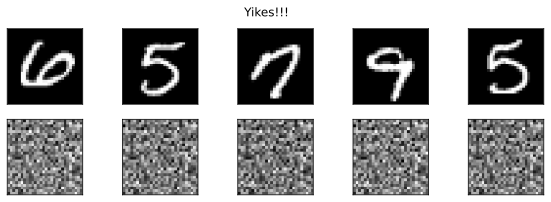

In [5]:
# let's see what the model did!
fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(yHat[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])

plt.suptitle('Yikes!!!')
plt.show()

In [6]:
def function2trainTheModel():

  # number of epochs
  numepochs = 10000

  # create a new model
  net,lossfun,optimizer = createTheMNISTAE()

  # initialize losses
  losses = torch.zeros(numepochs)


  # loop over epochs
  for epochi in range(numepochs):

    # select a random set of images
    randomidx = np.random.choice(dataT.shape[0],size=32)
    X = dataT[randomidx,:]

    # forward pass and loss
    yHat = net(X)
    loss = lossfun(yHat,X)

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # losses in this epoch
    losses[epochi] = loss.item()
  # end epochs

  # function output
  return losses,net

Final loss: 0.0058


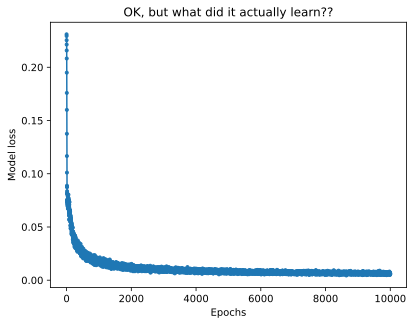

In [7]:
# train the model (90s)
losses,net = function2trainTheModel()
print(f'Final loss: {losses[-1]:.4f}')

# visualize the losses
plt.plot(losses,'.-')
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.title('OK, but what did it actually learn??')
plt.show()

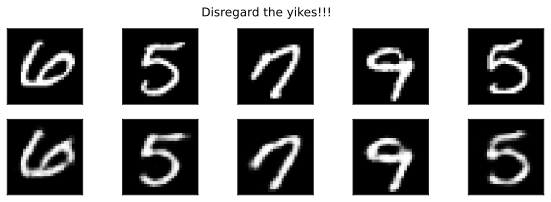

In [8]:
# Repeat the visualization when testing the model
X = dataT[:5,:]
yHat = net(X)


# let's see what the model did!
fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(yHat[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])

plt.suptitle('Disregard the yikes!!!')
plt.show()

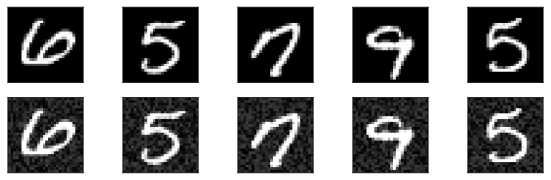

In [9]:
# grab a small set of images
X = dataT[:10,:]

# add noise
Xnoise = X + torch.rand_like(X)/4

# clip at 1
Xnoise[Xnoise>1] = 1


# show the noisy images
fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(Xnoise[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])

plt.show()

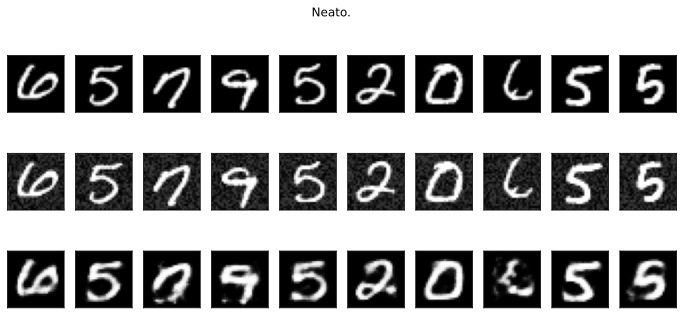

In [10]:
# run through the model
Y = net(Xnoise)


# show the noisy images
fig,axs = plt.subplots(3,10,figsize=(12,5))

for i in range(10):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(Xnoise[i,:].view(28,28).detach() ,cmap='gray')
  axs[2,i].imshow(Y[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  axs[2,i].set_xticks([]), axs[2,i].set_yticks([])

plt.suptitle('Neato.')
plt.show()

### Encoder and Bottleneck Units Experiment

In [11]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

# NEW!
import sys

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# import dataset (comes with colab!)
data = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')

# don't need labels!
data = data[:,1:]

# normalize the data to a range of [0 1]
dataNorm = data / np.max(data)

# convert to tensor
dataT = torch.tensor( dataNorm ).float()

In [12]:
# create a class for the model
def createTheMNISTAE(n_enc,n_bottle):

  class aenet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(784,n_enc)

      ### encoder layer
      self.encoding = nn.Linear(n_enc,n_bottle)

      ### bottleneck layer
      self.bottleneck = nn.Linear(n_bottle,n_enc)

      ### decoder layer
      self.decoding = nn.Linear(n_enc,784)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.encoding(x) )
      x = F.relu( self.bottleneck(x) )
      y = torch.sigmoid( self.decoding(x) )
      return y

  # create the model instance
  net = aenet()

  # loss function
  lossfun = nn.MSELoss()

  # optimizer
  optimizer = torch.optim.Adam(net.parameters(),lr=.001)

  return net,lossfun,optimizer

In [13]:
# note the difference in selecting samples compared to DUDL_autoenc_denoisingMNIST

def function2trainTheModel(n_enc,n_bottle):

  # number of epochs
  numepochs = 10

  # create a new model
  net,lossfun,optimizer = createTheMNISTAE(n_enc,n_bottle)

  # initialize losses
  losses = []


  # batch size and number of batches
  batchsize  = 32
  numBatches = int(dataT.shape[0]/batchsize)


  # loop over epochs (now each epoch goes through all samples)
  for epochi in range(numepochs):


    # get a permuted index vector
    randidx = np.random.permutation(dataT.shape[0]).astype(int)

    # losses during the batches
    batchlosses = []

    for batchi in range(numBatches):

      # samples to use in this batch
      samps2use = range((batchi-1)*batchsize,batchi*batchsize)


      # select those images
      X = dataT[randidx[samps2use],:]

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,X)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()


      # losses in this batch
      batchlosses.append( loss.item() )
    # end minibatch loop

    losses.append( np.mean(batchlosses[-3:]) )
    # Note about the above line: This was slightly incorrect in the recording. I said
    # to average the last 3 training losses, but the code in the video averaged all
    # the batch losses. However, that doesn't change the outcome or the conclusions.
  # end epoch loop

  # function output
  return losses,net

In [ ]:
# note! this cell takes ~25 minutes with initial N settings

# specific the number of units
N_encdec_units = np.linspace(10,500,12).astype(int)
N_bottle_units = np.linspace(5,100,8).astype(int)


# initialize results matrix
exp_results = np.zeros((len(N_encdec_units),len(N_bottle_units)))


# start the experiment!
for ei,nenc in enumerate(N_encdec_units):
  for bi,nbot in enumerate(N_bottle_units):

    # build/train a model
    losses = function2trainTheModel(nenc,nbot)[0] # only need the first output
    exp_results[ei,bi] = np.mean(losses[-1])

    # send update message
    currentIter = ei*len(N_bottle_units)+bi+1
    totalIters  = len(N_bottle_units)*len(N_encdec_units)
    msg = 'Finished experiment {}/{}'.format(currentIter,totalIters)
    sys.stdout.write('\r' + msg)

Finished experiment 75/96

In [ ]:
# show the results matrix
fig = plt.figure(figsize=(6,6))

plt.imshow(exp_results,aspect='auto',         # data and aspect ratio
           vmin=.01,vmax=.04, cmap='Purples', # color range and palette
           extent=[ N_bottle_units[0],N_bottle_units[-1],N_encdec_units[-1],N_encdec_units[0], ]) # xy axis ticks


plt.xlabel('Number of bottleneck units')
plt.ylabel('Number of encoder/decoder units')
plt.colorbar()

plt.show()

In [ ]:
# perhaps a line plot will better reveal the sudden transition

plt.plot(N_encdec_units,exp_results)
plt.legend(N_bottle_units,loc=(1.01,0))
plt.xlabel('Number of enc/dec units')
plt.title('Loss by bottleneck units')
plt.ylabel('Loss')
plt.show()